Source: https://www.youtube.com/watch?v=9_eZHt2qJs4&t=16s

KL divergence is measure how one probability distribution is different from second, reference distribution.

X is random variable and small x-s are the states it could take:
    $
    X=\{x_{1},x_{2},x_{3}, ..., x_{n}\}
    $

We want to compare different probability distribution $ \log p_{\theta}x_{1} $ with some other probability distribution $ \log q_{\phi }x_{1} $. They dont have to be same type of distributions (usually q is simpler to use distribution for modelling)

One way to calculate difference is use subtraction, which because we are using logs is division:
$$
\log p_{\theta}x_{1} - \log q_{\phi }x_{1} = \log[\frac{p_{\theta}x_{1}}{q_{\phi }x_{1}}]
$$

This division is called log likelihood ratio. But currently we are calculatiing difference between one sample. We would like to calculate average difference between p and q. In random variables we say what is expected value of the random vairable or what is its central tendency.

For random variables exptected value is weighted average of instances of random variable. Each variable and all states have probability of occurence and average should reflect that. Samples that have higher probability should contribute more to the average.
$$
\mathbb{E}_{p_{\theta }}[X]=\sum_{i=1}^{\infty}x_{i}p_{\theta }(x_{i})
$$

where:
- $x_{i}$ is state of the random variable
- $p_{\theta }(x_{i})$ is weight of the random variable


Here we showed that calculation should be done for very large number of samples


Here is same formula more in general, instead of random variable we calculate weighted average of a function of random variables 

$$
\mathbb{E}_{p_{\theta }}[h(X)]=\sum_{i=1}^{\infty}h(x_{i})p_{\theta }(x_{i})
$$

So far we have looked at discrete random variables. For continuous random variable we would calculate exptected value as such (summation has been replaced by integral):

$$
\mathbb{E}_{p_{\theta }}[h(X)]=\int_{\mathbb{R}}^{}h(x_{i})p_{\theta }(x_{i})
$$

Our log likelihood ratio is nothig but a function of random variable and since we are interested in average of this function we should be able to use expectation. So we need weights and compute the sums:

$$
\sum_{i=1}^{\infty}p_{\theta }(x_{i})\log[\frac{p_{\theta}x_{i}}{q_{\phi }x_{i}}]
$$

To be exact we are calculating exptected value of log likelihood ratio. This is __KL divergence__. We can express it using expectation symbol:

$$
\mathbb{E_{p}}[\log[\frac{p_{\theta}x_{i}}{q_{\phi }x_{i}}]=\sum_{i=i}^{\infty}p_{\theta }(x_{i})\log[\frac{p_{\theta}x_{i}}{q_{\phi }x_{i}}]
$$

Previous example was for discrete random variable for continuous random variable we replace summation with an integral:
$$
\mathbb{E_{p}}[\log[\frac{p_{\theta}x_{i}}{q_{\phi }x_{i}}]=\int_{\mathbb{R}}p_{\theta }(x_{i})\log[\frac{p_{\theta}x_{i}}{q_{\phi }x_{i}}]
$$

We have one problem. Integral and summation both go from minus infinity to infinity. We could get help from the __law of large numbers__: "as a sample size grows, its mean gets closer to the average of the whole population" (https://www.investopedia.com/terms/l/lawoflargenumbers.asp). So we can revrite KL divergence as a mean provided we use many samples:

$$
\frac{1}{N}\sum_{i=1}^{N}\log[\frac{p_{\theta}x_{i}}{q_{\phi }x_{i}}]
$$

Antoher notation used is:
    $$
    DD_{KL}(p_{\theta }||q_{\phi })=\int_{\mathbb{R}}p_{\theta }(x)log[\frac{p_{\theta}(x)}{q_{\phi }(x)}]dx
    $$
    
   This on is called __forward KL__

If we would like to use q instead of p for weighting:

$$
D_{KL}(q_{\phi }||p_{\theta })=\int_{\mathbb{R}}q_{\phi }(x)log[\frac{q_{\phi}(x)}{p_{\theta }(x)}]dx
$$

This on is called __reverse KL__.

These formulations are going to give different values. This is a reason why this is not called metric, but a distance.

Generally we use p for reference distribution and q for approximation.

Which one to use? It depends. Forward KL has mean-seeking behavior as reverse KL has mode seeking behavior.

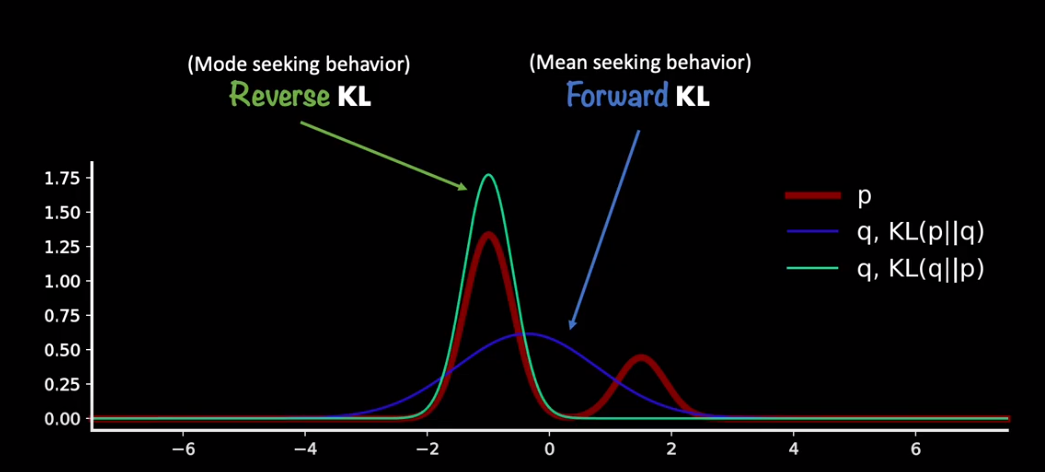

In [89]:
from IPython.display import display, Image
display(Image(filename="images/kl.png"))

Here we can see that reverse has picked up mean mode of the distribution. Most of the time when we are doing density estimation and using variatinal inference we use reverse scale. Forward KL is being used a lot in machine learning but you don't see name forward KL a lot. It is being used indirectly. For example when we are using cross-entropy loss in classificatin loss we are using KL indirectly (at least a  component of KL divergence).

## Example

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

### Sample KL divergence calculation

In [65]:
# Define the two distributions
p = norm(0, 1)
q = norm(0.5, 2)

samples_q=q.rvs(1000)
samples_p=p.rvs(1000)
# Forward KL divergence
forward_kl = np.sum(p.logpdf(samples_q) - q.logpdf(samples_q))
print("Forward KL divergence:", forward_kl)

# Reverse KL divergence
reverse_kl = np.sum(q.logpdf(samples_p) - p.logpdf(samples_p))
print("Reverse KL divergence:", reverse_kl)

Forward KL divergence: -1008.6516711191375
Reverse KL divergence: -333.72609786923385


In [66]:
def plot_p_q_dens(samples_p, samples_q):
    df_q=pd.DataFrame({'q':samples_q})
    df_p=pd.DataFrame({'p':samples_p})
    ax=df_p.plot(kind='density')
    df_q.plot(kind='density', ax=ax)

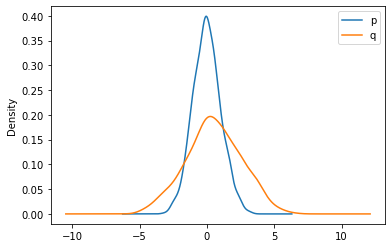

In [68]:
plot_p_q_dens(samples_p, samples_q)

### Run forward and reverse on multimodal data

Very simple example, does not estimate standard deviation, only estimates mean. Only for educational purpose not well checked or error-free

In [7]:
class Pdf:
    """custom class to get pdf out of samples. Just takes proportion of data in that interval
    Very simple, if value ot of sample range, takes last value probability of sample in range"""
    def __init__(self, samples, n_bins=100, smoothing_value=0.00001):
        self.samples=samples
        self.n_bins=n_bins
        self.smoothing_value=smoothing_value
        self.bins, self.bins_perc=self.create_bins(self.samples, n_bins=self.n_bins)
        self.bins_perc[self.bins_perc == 0]=self.smoothing_value
    
    def create_bins(self, samples, n_bins=100):
        num_bin, bins=np.histogram(samples, bins=n_bins)
        bins_perc=num_bin/sum(num_bin)
        return bins, bins_perc
    
    def get_pdf(self, x):
        if isinstance(x, (np.ndarray)):
            x=x[:,None]
            bin_idx=np.absolute((self.bins-x)).argmin(1)
            bin_idx[bin_idx>len(self.bins_perc)-1]=len(self.bins_perc)-1
        else:
            bin_idx=np.absolute((self.bins-x)).argmin()
            bin_idx=min(bin_idx, len(self.bins_perc)-1)
        return self.bins_perc[bin_idx]
    
    def get_logpdf(self, x):
        p=self.get_pdf(x)
        return np.log(p)
    
    def mean(self):
        return np.mean(self.samples)

In [79]:
def estimate_dist(samples, initial_mean=2.0, num_samples_q=1000,
                  initial_std=1.0, num_steps=1000, 
                  step_size=0.1, return_data=False, 
                  kl_forward=True, **kwargs):
    #orig data pdf estimation
    pdf_p=Pdf(samples, **kwargs)
    
    q = norm(initial_mean, initial_std)
    samples_q=q.rvs(num_samples_q)
    
    # Initialize the means and KL divergence values
    means = [initial_mean]
    kl_divergences = []

    for i in range(num_steps):
        if kl_forward: #forward kl
            kl = np.sum(pdf_p.get_pdf(samples_q)*(pdf_p.get_logpdf(samples_q) - q.logpdf(samples_q)))
            gradient = q.pdf(initial_mean) * (initial_mean - pdf_p.mean()) / initial_std**2
        else: #reverse kl
            kl= np.sum(q.pdf(samples)*(q.logpdf(samples) - pdf_p.get_logpdf(np.array(samples))))
            gradient = pdf_p.get_pdf(initial_mean) * (initial_mean - pdf_p.mean()) / initial_std**2
        initial_mean -= step_size * gradient
        kl_divergences.append(kl)

        q = norm(initial_mean, initial_std)
        samples_q=q.rvs(num_samples_q)
        means.append(initial_mean)
        
    plt.plot(kl_divergences)
    plt.xlabel('Step')
    plt.ylabel('KL Divergence')
    plt.show()
    plt.plot(means)
    plt.xlabel('Step')
    plt.ylabel('Mean')
    plt.show()
        
    plot_p_q_dens(samples, samples_q)
    if return_data:
        return kl_divergences, means, samples_q

#### Generate data

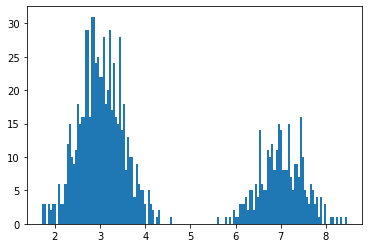

In [84]:
#generate data we have, multimodal
mu, sigma = 3, 0.5 # mean and standard deviation
p_samples = np.random.normal(mu, sigma, 700)
mu2, sigma2 = 7.0, 0.5 # mean and standard deviation
p_samples2 = np.random.normal(mu2, sigma2, 300)
p_samples=p_samples.tolist()+p_samples2.tolist()

pdf_p=Pdf(p_samples)
_=plt.hist(p_samples, bins=150)

#### Reverse KL - tries to find one mode

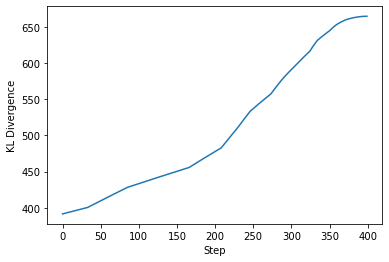

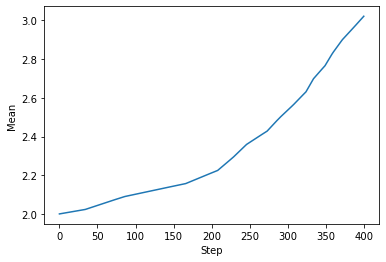

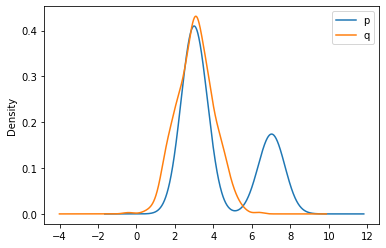

In [87]:
estimate_dist(p_samples, kl_forward=False, num_steps=400)

#### Forward KL - tries to find mean

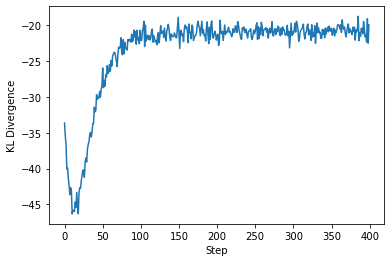

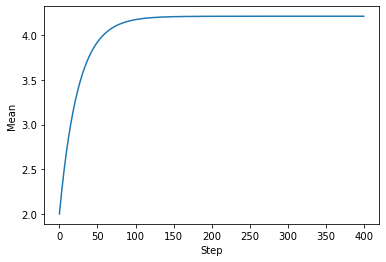

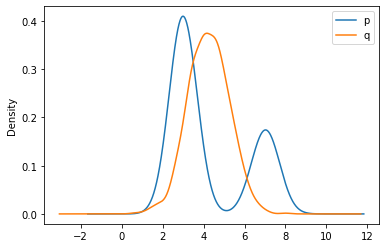

In [91]:
estimate_dist(p_samples, num_steps=400)

Convert to pdf:  jupyter nbconvert --to webpdf --allow-chromium-download .\kl_divergence.ipynb